In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
df = pd.read_csv('LifeExpectancy.csv')

In [3]:
df.head()

,Country,Year,Status,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,...,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
0,Afghanistan,2015,Developing,65.0,263.0,62,0.01,71.279624,65.0,1154,...,6.0,8.16,65.0,0.1,584.259210,33736494.0,17.2,17.3,0.479,10.1
1,Afghanistan,2014,Developing,59.9,271.0,64,0.01,73.523582,62.0,492,...,58.0,8.18,62.0,0.1,612.696514,327582.0,17.5,17.5,0.476,10.0
2,Afghanistan,2013,Developing,59.9,268.0,66,0.01,73.219243,64.0,430,...,62.0,8.13,64.0,0.1,631.744976,31731688.0,17.7,17.7,0.470,9.9
3,Afghanistan,2012,Developing,59.5,272.0,69,0.01,78.184215,67.0,2787,...,67.0,8.52,67.0,0.1,669.959000,3696958.0,17.9,18.0,0.463,9.8
4,Afghanistan,2011,Developing,59.2,275.0,71,0.01,7.097109,68.0,3013,...,68.0,7.87,68.0,0.1,63.537231,2978599.0,18.2,18.2,0.454,9.5


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2938 entries, 0 to 2937
Data columns (total 22 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Country                          2938 non-null   object 
 1   Year                             2938 non-null   int64  
 2   Status                           2938 non-null   object 
 3   Life expectancy                  2928 non-null   float64
 4   Adult Mortality                  2928 non-null   float64
 5   infant deaths                    2938 non-null   int64  
 6   Alcohol                          2744 non-null   float64
 7   percentage expenditure           2938 non-null   float64
 8   Hepatitis B                      2385 non-null   float64
 9   Measles                          2938 non-null   int64  
 10  BMI                              2904 non-null   float64
 11  under-five deaths                2938 non-null   int64  
 12  Polio               

In [5]:
df.shape

(2938, 22)

In [6]:
df.isnull().sum()

Country                              0
Year                                 0
Status                               0
Life expectancy                     10
Adult Mortality                     10
infant deaths                        0
Alcohol                            194
percentage expenditure               0
Hepatitis B                        553
Measles                              0
BMI                                 34
under-five deaths                    0
Polio                               19
Total expenditure                  226
Diphtheria                          19
HIV/AIDS                             0
GDP                                448
Population                         652
thinness  1-19 years                34
thinness 5-9 years                  34
Income composition of resources    167
Schooling                          163
dtype: int64

# Exploratory Data Analysis 

In [7]:
for col in df.columns:
  df[col] = df[col].interpolate(method='linear',limit_direction='both')

In [8]:
df.isnull().sum()

Country                            0
Year                               0
Status                             0
Life expectancy                    0
Adult Mortality                    0
infant deaths                      0
Alcohol                            0
percentage expenditure             0
Hepatitis B                        0
Measles                            0
BMI                                0
under-five deaths                  0
Polio                              0
Total expenditure                  0
Diphtheria                         0
HIV/AIDS                           0
GDP                                0
Population                         0
thinness  1-19 years               0
thinness 5-9 years                 0
Income composition of resources    0
Schooling                          0
dtype: int64

# Detecting & Filtering Outliers.

Discover outliers with the IQR score, also called the midspread or middle 50%, or technically H-spread, is a measure of statistical dispersion, being equal to the difference between 75th and 25th percentiles, or between upper and lower quartiles, IQR = Q3 − Q1.

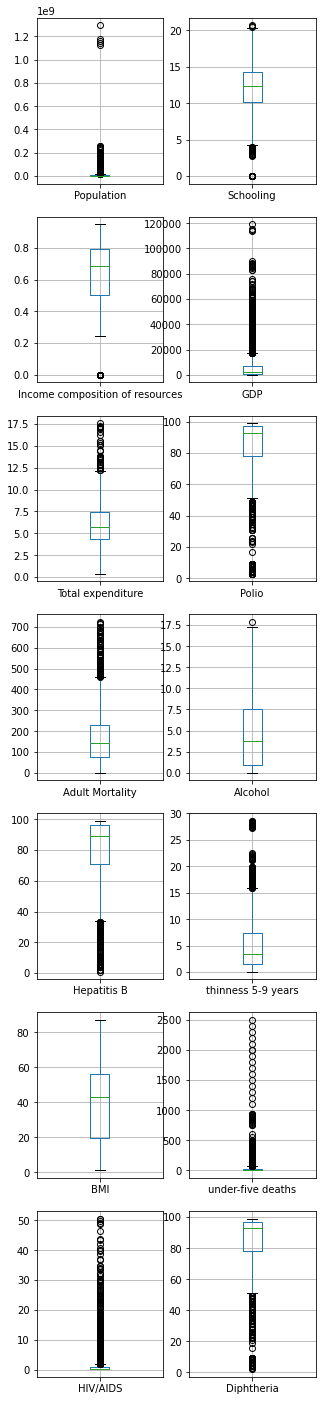

In [9]:
fig, axes = plt.subplots(7,2,figsize=(5,25))
df.boxplot(column='Population', ax=axes[0,0])

df.boxplot(column='Schooling',ax=axes[0,1])

df.boxplot(column='Income composition of resources',ax=axes[1,0])
df.boxplot(column='GDP',ax=axes[1,1])

df.boxplot(column='Total expenditure',ax=axes[2,0])
df.boxplot(column='Polio',ax=axes[2,1])

df.boxplot(column='Adult Mortality',ax=axes[3,0])
df.boxplot(column='Alcohol',ax=axes[3,1])

df.boxplot(column='Hepatitis B',ax=axes[4,0])
df.boxplot(column='thinness 5-9 years',ax=axes[4,1])

df.boxplot(column='BMI',ax=axes[5,0])
df.boxplot(column='under-five deaths',ax=axes[5,1])

df.boxplot(column='HIV/AIDS',ax=axes[6,0])
df.boxplot(column='Diphtheria',ax=axes[6,1])

In [10]:
Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75)
IQR = Q3 - Q1
print(IQR)

Year                               8.000000e+00
Life expectancy                    1.250000e+01
Adult Mortality                    1.540000e+02
infant deaths                      2.200000e+01
Alcohol                            6.647500e+00
percentage expenditure             4.368488e+02
Hepatitis B                        2.500000e+01
Measles                            3.602500e+02
BMI                                3.677500e+01
under-five deaths                  2.800000e+01
Polio                              1.900000e+01
Total expenditure                  3.127500e+00
Diphtheria                         1.900000e+01
HIV/AIDS                           7.000000e-01
GDP                                6.635257e+03
Population                         7.954483e+06
thinness  1-19 years               5.600000e+00
thinness 5-9 years                 5.700000e+00
Income composition of resources    2.911071e-01
Schooling                          4.100000e+00
dtype: float64


In [11]:
df_clean = df[~((df < (Q1 - 1.5 * IQR)) |(df > (Q3 + 1.5 * IQR))).any(axis=1)]

In [12]:
df_clean.shape

(1117, 22)

In [13]:
df_clean.corr()

,Year,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,BMI,under-five deaths,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
Year,1.000000,0.046186,-0.026471,0.062363,-0.136004,-0.041569,0.153244,0.032863,-0.015976,0.071424,-0.030733,0.036035,0.022674,0.003294,0.058686,0.001704,0.025769,0.035145,0.012818,0.068773
Life expectancy,0.046186,1.000000,-0.564329,-0.333388,0.406726,0.324035,0.154186,-0.113293,0.386781,-0.376161,0.346108,0.274791,0.357826,-0.484477,0.151110,0.016706,-0.390887,-0.389912,0.805275,0.681330
Adult Mortality,-0.026471,-0.564329,1.000000,0.230186,-0.105939,-0.197141,-0.144125,0.081875,-0.255414,0.246407,-0.190374,-0.145796,-0.192808,0.331473,-0.043454,0.002054,0.166043,0.169304,-0.438029,-0.355802
infant deaths,0.062363,-0.333388,0.230186,1.000000,-0.273842,-0.135409,-0.122990,0.304604,-0.165646,0.990827,-0.194155,-0.078475,-0.197169,0.160815,-0.100949,0.196528,0.230328,0.224847,-0.370746,-0.342771
Alcohol,-0.136004,0.406726,-0.105939,-0.273842,1.000000,0.158691,0.117749,-0.111140,0.245870,-0.280712,0.262291,0.300141,0.270393,-0.190044,0.269904,0.008718,-0.392228,-0.385471,0.546137,0.488217
percentage expenditure,-0.041569,0.324035,-0.197141,-0.135409,0.158691,1.000000,0.063083,-0.046848,0.176364,-0.149709,0.099510,0.120599,0.122829,-0.153798,0.276896,0.047876,-0.154892,-0.160608,0.294088,0.294369
Hepatitis B,0.153244,0.154186,-0.144125,-0.122990,0.117749,0.063083,1.000000,-0.086199,0.093393,-0.138650,0.579782,0.087311,0.618393,-0.185202,0.099585,0.046312,-0.022081,-0.026047,0.205560,0.189146
Measles,0.032863,-0.113293,0.081875,0.304604,-0.111140,-0.046848,-0.086199,1.000000,-0.085606,0.309308,-0.076544,-0.103122,-0.064787,0.057060,-0.030443,0.082037,0.196054,0.192717,-0.085280,-0.086419
BMI,-0.015976,0.386781,-0.255414,-0.165646,0.245870,0.176364,0.093393,-0.085606,1.000000,-0.197933,0.122247,0.177492,0.131703,-0.288259,0.133144,0.074976,-0.511788,-0.517439,0.433088,0.389796
under-five deaths,0.071424,-0.376161,0.246407,0.990827,-0.280712,-0.149709,-0.138650,0.309308,-0.197933,1.000000,-0.217930,-0.084952,-0.219652,0.206854,-0.114807,0.192571,0.258271,0.249987,-0.412359,-0.375279


In [14]:
df_clean.corr()['Life expectancy'].sort_values(ascending=False)

Life expectancy                    1.000000
Income composition of resources    0.805275
Schooling                          0.681330
Alcohol                            0.406726
BMI                                0.386781
Diphtheria                         0.357826
Polio                              0.346108
percentage expenditure             0.324035
Total expenditure                  0.274791
Hepatitis B                        0.154186
GDP                                0.151110
Year                               0.046186
Population                         0.016706
Measles                           -0.113293
infant deaths                     -0.333388
under-five deaths                 -0.376161
thinness 5-9 years                -0.389912
thinness  1-19 years              -0.390887
HIV/AIDS                          -0.484477
Adult Mortality                   -0.564329
Name: Life expectancy, dtype: float64

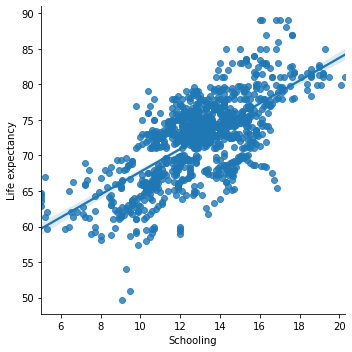

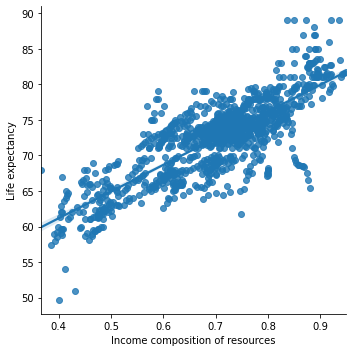

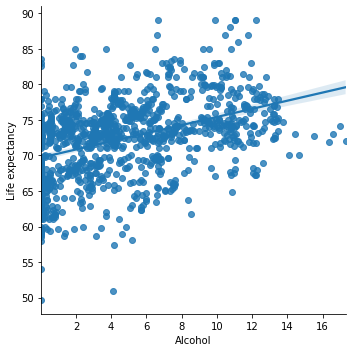

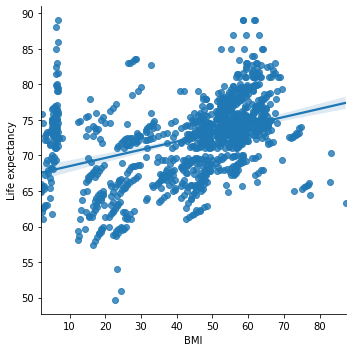

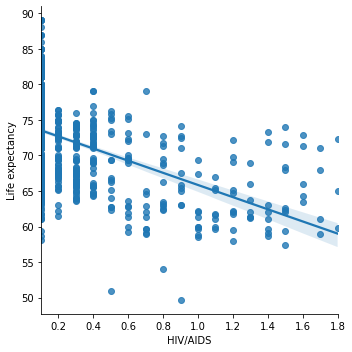

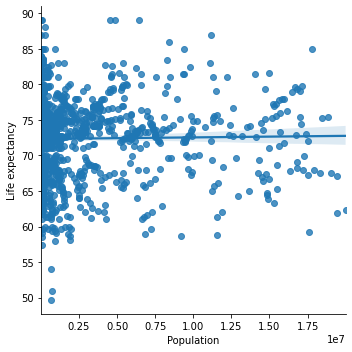

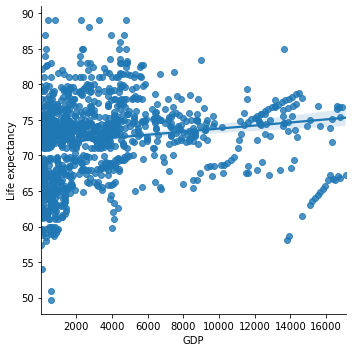

In [16]:
sns.lmplot(x='Schooling',y='Life expectancy',data=df_clean)

sns.lmplot(x='Income composition of resources',y='Life expectancy',data=df_clean)
 
sns.lmplot(x='Alcohol',y='Life expectancy',data=df_clean)


sns.lmplot(x='BMI',y='Life expectancy',data=df_clean)


sns.lmplot(x='HIV/AIDS',y='Life expectancy',data=df_clean)

sns.lmplot(x='Population',y='Life expectancy',data=df_clean)

sns.lmplot(x='GDP',y='Life expectancy',data=df_clean)


In [17]:
df_clean['Status'].unique()

array(['Developing', 'Developed'], dtype=object)

In [18]:
dmap = {'Developed':1,'Developing':0}
df_clean['Status'] = df_clean['Status'].map(dmap)

<ipython-input-18-06b60c8f3e35>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_clean['Status'] = df_clean['Status'].map(dmap)


In [19]:
df_clean.head(10)

,Country,Year,Status,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,...,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
16,Albania,2015,0,77.8,74.0,0,4.60,364.975229,99.0,0,...,99.0,6.00,99.0,0.1,3954.227830,28873.0,1.2,1.3,0.762,14.2
17,Albania,2014,0,77.5,8.0,0,4.51,428.749067,98.0,0,...,98.0,5.88,98.0,0.1,4575.763787,288914.0,1.2,1.3,0.761,14.2
18,Albania,2013,0,77.2,84.0,0,4.76,430.876979,99.0,0,...,99.0,5.66,99.0,0.1,4414.723140,289592.0,1.3,1.4,0.759,14.2
19,Albania,2012,0,76.9,86.0,0,5.14,412.443356,99.0,9,...,99.0,5.59,99.0,0.1,4247.614380,2941.0,1.3,1.4,0.752,14.2
20,Albania,2011,0,76.6,88.0,0,5.37,437.062100,99.0,28,...,99.0,5.71,99.0,0.1,4437.178680,295195.0,1.4,1.5,0.738,13.3
21,Albania,2010,0,76.2,91.0,1,5.28,41.822757,99.0,10,...,99.0,5.34,99.0,0.1,494.358832,291321.0,1.4,1.5,0.725,12.5
22,Albania,2009,0,76.1,91.0,1,5.79,348.055952,98.0,0,...,98.0,5.79,98.0,0.1,4114.136545,2927519.0,1.5,1.6,0.721,12.2
23,Albania,2008,0,75.3,1.0,1,5.61,36.622068,99.0,0,...,99.0,5.87,99.0,0.1,437.539647,2947314.0,1.6,1.6,0.713,12.0
24,Albania,2007,0,75.9,9.0,1,5.58,32.246552,98.0,22,...,99.0,6.10,98.0,0.1,363.136850,29717.0,1.6,1.7,0.703,11.6
25,Albania,2006,0,74.2,99.0,1,5.31,3.302154,98.0,68,...,97.0,5.86,97.0,0.1,35.129300,2992547.0,1.7,1.8,0.696,11.4


# **Training and Testing Data Univariate**

In [20]:
X = df[['Schooling']]
y = df['Life expectancy']

In [21]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=101)

# **Training the Model**

In [26]:
from sklearn.linear_model import LinearRegression

In [29]:
lm = LinearRegression()

In [30]:
lm.fit(X_train,y_train)

LinearRegression()

In [31]:
print('Coefficients:\n',lm.coef_)
print('\n')
print('Intercept:\n',lm.intercept_)

Coefficients:
 [2.01973177]


Intercept:
 44.7708829139077


# **Predicting Test Data**

In [32]:
predictions = lm.predict(X_test)

Text(0, 0.5, 'Predicted Y')

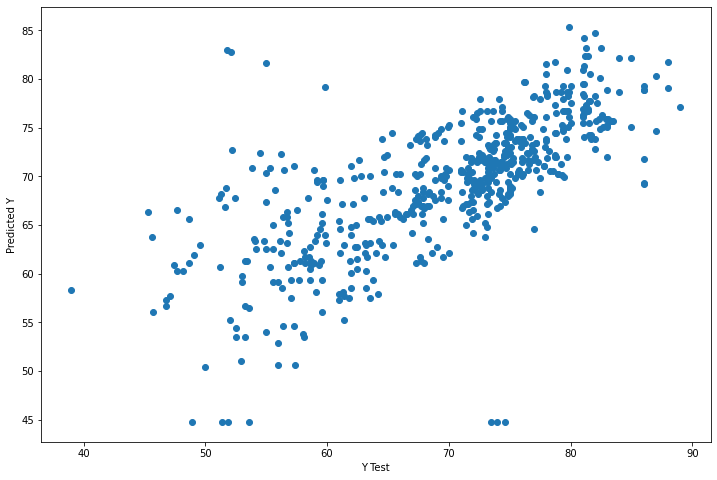

In [33]:
plt.figure(figsize=(12,8))
plt.scatter(y_test,predictions)
plt.xlabel('Y Test')
plt.ylabel('Predicted Y')

In [34]:
from sklearn import metrics

print('MAE:', metrics.mean_absolute_error(y_test, predictions))
print('MSE:', metrics.mean_squared_error(y_test, predictions))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, predictions)))

MAE: 4.664264485875593
MSE: 42.63397487934134
RMSE: 6.529469724207421


# **Training and Testing Data Multivariate**


In [35]:
y = df_clean['Life expectancy'].values
X = df_clean.drop(['Country','Life expectancy'],axis=1).values 

In [36]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=101)

In [37]:
from sklearn.linear_model import LinearRegression

In [38]:
lm = LinearRegression()

In [39]:
lm.fit(X_train,y_train)

LinearRegression()

In [41]:
predictions_multi = lm.predict(X_test)

Text(0, 0.5, 'Predicted Y')

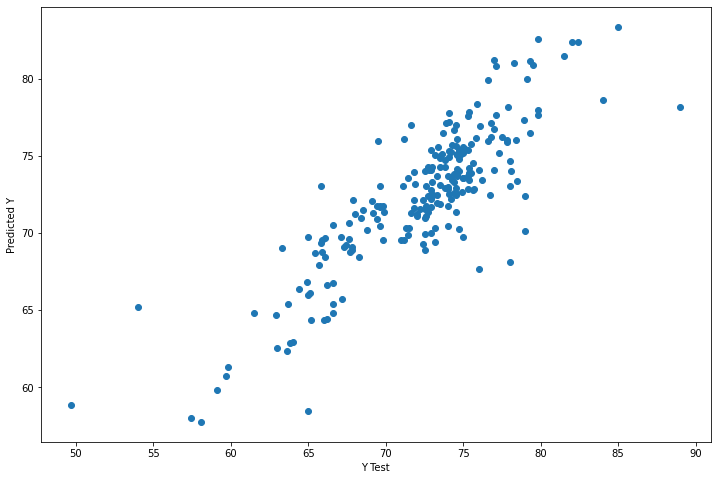

In [42]:
plt.figure(figsize=(12,8))
plt.scatter(y_test,predictions_multi)
plt.xlabel('Y Test')
plt.ylabel('Predicted Y')

In [44]:
#Evaluating the model
from sklearn import metrics

print('MAE:', metrics.mean_absolute_error(y_test, predictions_multi))
print('MSE:', metrics.mean_squared_error(y_test, predictions_multi))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, predictions_multi)))

MAE: 2.0483314061988844
MSE: 7.733837525532356
RMSE: 2.780977800258815
